<a href="https://colab.research.google.com/github/kjedrzejczak/Machine_Learning_Bootcamp_practice_II/blob/main/09_PCA_CIFAR_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Zbiór danych Cifra

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [4]:
X_train = X_train[:5000] # ograniczanie ilości danych w ściczeniu
y_train = y_train[:5000]

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

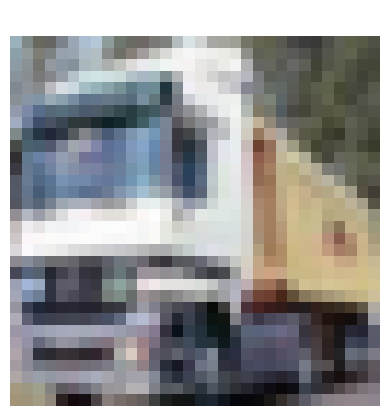

In [6]:
targets = {0:'airpline', 1:'automibile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

plt.imshow(X_train[1])
plt.title(targets[y_train[1][0]], color='white', fontsize=17)
plt.axis('off')
plt.show()

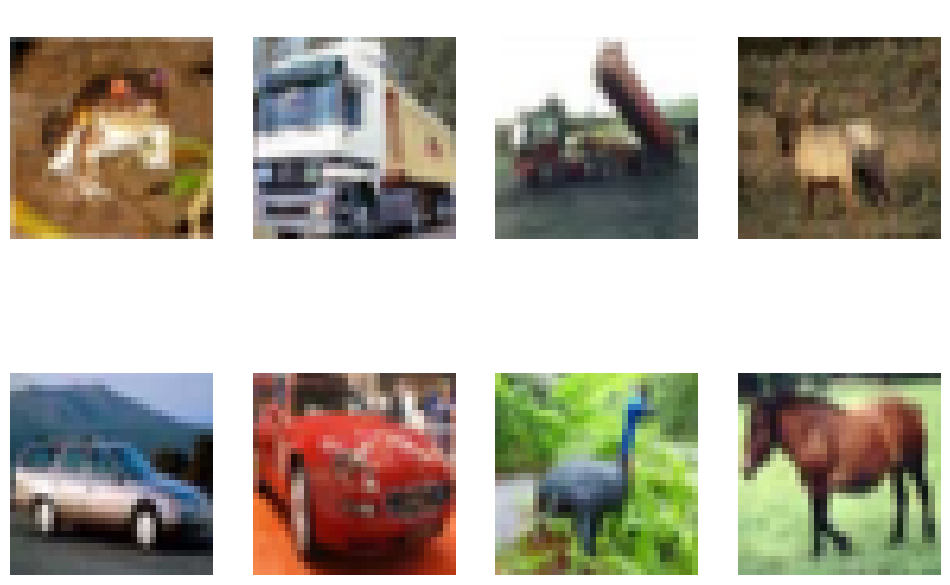

In [7]:
plt.figure(figsize=(12, 8))
for i in range(8):
  plt.subplot(240 + i + 1)
  plt.imshow(X_train[i])
  plt.title(targets[y_train[i][0]], color='white', fontsize=17)
  plt.axis('off')
plt.show()

# Standaryzacja

In [8]:
X_train = X_train / 255.
X_test = X_test / 255.
X_train.shape

(5000, 32, 32, 3)

In [9]:
X_train = X_train.reshape(-1, 32 * 32 * 3)
X_train.shape

(5000, 3072)

In [10]:
X_train[:5]

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       [0.10980392, 0.09803922, 0.03921569, ..., 0.28235294, 0.25490196,
        0.18039216],
       [0.66666667, 0.70588235, 0.77647059, ..., 0.28627451, 0.30196078,
        0.31372549]])

In [11]:
X_train[0]

array([0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
       0.28235294])

# PCA 3 komponenty

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ -6.50231806,   2.55047993,   1.5772221 ],
       [  0.87089031,  -0.87150005,   6.2163157 ],
       [  8.11101293, -11.1947899 ,  -2.6911679 ],
       [-10.35215989,  -0.23942379,   1.25219214],
       [ -2.46193879,  -4.83469694,   1.24786079]])

Wyjasniona warjancja

In [13]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index +  1
results

,explained_variance_ratio,cumulative,component
0,0.291944,0.291944,1
1,0.112451,0.404395,2
2,0.066359,0.470754,3


In [14]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - components', width=950, template='plotly_dark'))
fig.show()

In [15]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['name'] = X_train_pca_df['class'].map(targets)
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class,name
0,-6.502318,2.550480,1.577222,6.0,frog
1,0.870890,-0.871500,6.216316,9.0,truck
2,8.111013,-11.194790,-2.691168,9.0,truck
3,-10.352160,-0.239424,1.252192,4.0,deer
4,-2.461939,-4.834697,1.247861,1.0,automibile


In [16]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='name',
              symbol='name', opacity=0.6, size_max=10, width=950, height=700,
              title='PCA - CIFAR dataset', template='plotly_dark')

PCA - 0.95% wariancji

In [17]:
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[-6.50231806e+00,  2.55047994e+00,  1.57722247e+00, ...,
        -2.10345709e-01,  9.38130149e-02, -2.89977342e-02],
       [ 8.70890309e-01, -8.71500104e-01,  6.21631617e+00, ...,
        -3.18056931e-01,  2.74423894e-01, -6.62263198e-01],
       [ 8.11101293e+00, -1.11947898e+01, -2.69116895e+00, ...,
        -2.74431791e-01,  2.52386557e-01,  6.04692572e-02],
       [-1.03521599e+01, -2.39423778e-01,  1.25219222e+00, ...,
         4.37196662e-03,  5.74917931e-02,  2.31462311e-02],
       [-2.46193879e+00, -4.83469706e+00,  1.24786125e+00, ...,
         9.38267627e-02,  2.29990090e-01, -3.35153704e-02]])

In [18]:
X_train_pca.shape

(5000, 203)

In [19]:
pca.n_components_

203

In [20]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index +  1
results

,explained_variance_ratio,cumulative,component
0,0.291944,0.291944,1
1,0.112451,0.404395,2
2,0.066359,0.470754,3
3,0.037136,0.507891,4
4,0.035443,0.543334,5
...,...,...,...
198,0.000279,0.949025,199
199,0.000277,0.949302,200
200,0.000271,0.949574,201
201,0.000269,0.949843,202


In [21]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - components', width=950, template='plotly_dark'))
fig.show()